# **LAB 1: LOGISTIC REGRESSION**
# Santosh Mahato Koiri (ACE079BCT059)

## 0. Background
**AI (Artificial Intelligence)**
The broadest category. It refers to any technique that enables computers to mimic human intelligence, logic, or behavior. This includes everything from simple "if-then" rules to complex systems.

**ML (Machine Learning)**
A subset of AI. Instead of being explicitly programmed with rules, the system uses algorithms to find patterns in data and improve its performance over time through experience.

**DL (Deep Learning)**
A subset of ML. It uses Neural Networks with many layers (hence "deep") to process data. It is inspired by the human brain and is the tech behind advanced things like facial recognition and ChatGPT.

**Data Science**
An interdisciplinary field that overlaps with all the above. It combines statistics, specialized programming, and domain expertise to extract meaningful insights and "stories" from data.

In [17]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# **Task 1: Logistic Regression with a Single Feature**
For the first task, we build a logistic regression model using only one input feature. The input feature is "Cholestrol".

## 1. Data Retrieval and Collection

In [18]:
try:
    df = pd.read_csv('Heart_Disease_Prediction.csv')
except FileNotFoundError:
    print("File not found. Please upload 'Heart_Disease_Prediction.csv' to your notebook environment.")

Check shape of dataset and column names.

In [19]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (270, 14)
Columns: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='str')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


The shape output tells us that there are 270 rows and 14 columns.
The columns output lists out all 14 column names. 
df.head() gives first 5 data samples.


## 2. Data Cleaning
We check for missing values and ensure the target variable is binary.
In this dataset, the target column is named `Heart Disease`.

In [21]:
# check empty data(null)
print(df.isnull().sum())

# Inspect column to print out the unique categories
target_col = 'Heart Disease'
print(f"Unique values in '{target_col}':", df[target_col].unique())

# Translate category words into number 
if df[target_col].dtype == 'object':
    df[target_col] = df[target_col].map({'Presence': 1, 'Absence': 0})
    print("Converted target to binary (1=Presence, 0=Absence)")
    
#final output
print("Final unique values:", df[target_col].unique())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Unique values in 'Heart Disease': <StringArray>
['Presence', 'Absence']
Length: 2, dtype: str
Final unique values: <StringArray>
['Presence', 'Absence']
Length: 2, dtype: str


### Observations:
The dataset contains no missing values, as a check for null entries across all columns returned zero results. Specifically, the 'Cholesterol' feature was found to be entirely complete with no invalid data points. To prepare the data for modeling, the 'Heart Disease' target variable was transformed from categorical text into a binary format, where 1 represents the presence and 0 represents the absence of the condition. Finally, a check was conducted to verify and confirm the consistency of the data types across the entire processed dataframe.

## 3. Feature Design
In this step, we select our input feature and target variable.
* Input Feature (X): Cholesterol
* Target Variable (y): Heart Disease

### Why is Cholesterol a relevant predictor?
Medically, high levels of cholesterol can lead to the buildup of plaque in the arteries (atherosclerosis). This narrows the arteries and restricts blood flow to the heart, significantly increasing the risk of a heart attack or other cardiovascular diseases. Therefore, we expect to see a correlation between higher cholesterol levels and the presence of heart disease.

In [10]:
# Select the Feature (X) and Target (y)
feature_col = 'Cholesterol'
target_col = 'Heart Disease'

# X must be a DataFrame (2D array), so we use double brackets
X = df[[feature_col]]

# y is a Series (1D array)
y = df[target_col]

# 2. Check the shapes to ensure dimensions match
print("Feature set (X) shape:", X.shape)
print("Target set (y) shape:", y.shape)

Feature set (X) shape: (270, 1)
Target set (y) shape: (270,)


## 4. Algorithm Selection
We have chosen Logistic Regression for this task.

### Why is it suitable for binary classification?
Unlike Linear Regression, which predicts a continuous number (like price), Logistic Regression is designed to predict the probability of an event occurring (e.g., "75% chance of Heart Disease").
* It uses the Sigmoid Function to squash the output between 0 and 1.
* It allows us to set a threshold (usually 0.5) to classify the result as either `1` (Presence) or `0` (Absence).

In [11]:
# Initialize the Logistic Regression model
# random_state=42 ensures the results are reproducible (same every time we run it)
#42 is a random number, can be any number
model = LogisticRegression(random_state=42)

## 5. Loss Function Selection
The Logistic Regression algorithm uses Binary Cross-Entropy (also known as Log Loss) to measure error during training.

### How does Log Loss work?
It acts like a penalty system that imposes a heavy cost on confident but wrong predictions.
* If the true label is 1 (Disease) but the model predicts a probability of 0.01 (very confident it's healthy), the loss is massive.
* The goal of training is to minimize this total loss to find the best-fitting Sigmoid curve.

## 6. Model Learning
We will now split the data into a Training Set (80%) to teach the model and a Testing Set (20%) to evaluate it.

### Learning Parameters
When we run .fit(), the model iteratively adjusts its Intercept and Coefficient to minimize the Log Loss.

In [12]:
# 1. Split the data
# We use 'X' because that is what we named it in Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Output the learned parameters
print("Model Training Complete.")
print(f"Learned Intercept (b): {model.intercept_[0]:.4f}")
print(f"Learned Coefficient (w): {model.coef_[0][0]:.4f}")

Model Training Complete.
Learned Intercept (b): -1.0470
Learned Coefficient (w): 0.0035


### Observation: Model Parameters
* **Intercept ($b \approx -1.05$):** This represents the baseline log-odds of having heart disease when Cholesterol is 0.
* **Coefficient ($w \approx 0.0035$):** The positive value confirms a positive correlation. It indicates that as Cholesterol levels increase, the probability of Heart Disease increases slightly.

## 7. Model Evaluation
We will now evaluate the model using the Testing Set. We will look at Accuracy, the Confusion Matrix, and visualize the results with a Sigmoid Curve.

Accuracy Score: 0.61

Confusion Matrix:
 [[28  5]
 [16  5]]

Classification Report:
               precision    recall  f1-score   support

     Absence       0.64      0.85      0.73        33
    Presence       0.50      0.24      0.32        21

    accuracy                           0.61        54
   macro avg       0.57      0.54      0.52        54
weighted avg       0.58      0.61      0.57        54



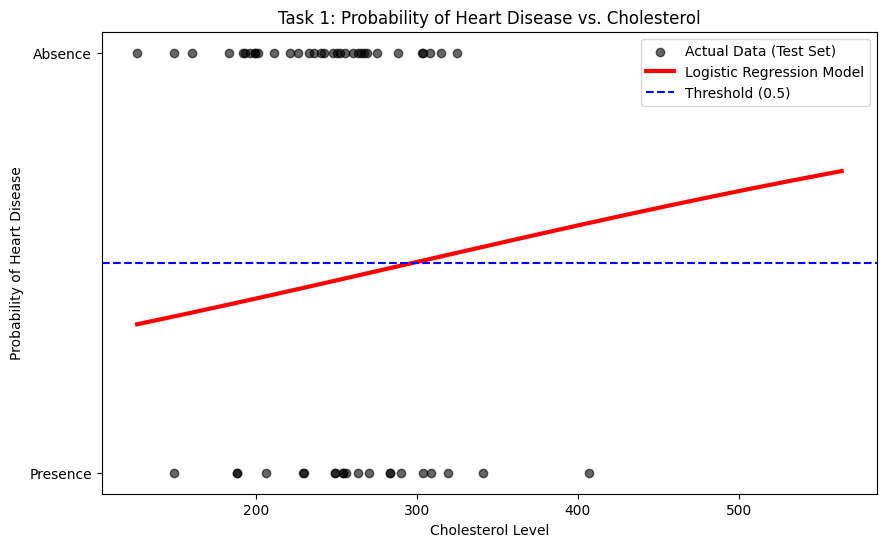

In [13]:
# 1. Generate Predictions on Test Data
y_pred = model.predict(X_test)

# 2. Print Evaluation Metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Plotting the Sigmoid Curve
plt.figure(figsize=(10, 6))

# A. Scatter plot of the actual test data
plt.scatter(X_test, y_test, color='black', alpha=0.6, label='Actual Data (Test Set)')

# B. Generate the red Sigmoid line
# FIX: Use df['Cholesterol'] instead of X_single so it works no matter what you named your variable
x_vals = np.linspace(df['Cholesterol'].min(), df['Cholesterol'].max(), 300).reshape(-1, 1)

# FIX: Convert to DataFrame with correct column name to silence the warning
x_df = pd.DataFrame(x_vals, columns=['Cholesterol'])

# Predict probability
y_prob = model.predict_proba(x_df)[:, 1]

# Plot line
plt.plot(x_vals, y_prob, color='red', linewidth=3, label='Logistic Regression Model')

# C. Formatting
plt.axhline(0.5, color='blue', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Probability of Heart Disease')
plt.title('Task 1: Probability of Heart Disease vs. Cholesterol')
plt.legend()
plt.show()

## Observation and Interpretation
Accuracy: The model achieved an accuracy of 0.61 (61%). This means it correctly predicted the outcome for about 6 out of 10 patients, which is only slightly better than random guessing.

Confusion Matrix:

True Negatives: 28 (Healthy patients correctly identified)

False Positives: 5 (Healthy patients wrongly labeled as sick)

False Negatives: 16 (Sick patients wrongly labeled as healthy)

True Positives: 5 (Sick patients correctly identified)

Key Issue (Recall): The recall for Class 1 (Heart Disease) is very low at 0.24. This means the model only detected 24% of the actual heart disease cases. It missed 16 out of 21 sick patients.

## Conclusion: 
The high number of false negatives and the flat sigmoid curve suggest that Cholesterol alone is a poor predictor of heart disease. There is too much overlap between healthy and sick patients on this single feature to draw a clear decision boundary.

# ---------------------------------------------------------
# **Task 2: Logistic Regression with Multiple Features**


## 1 & 2. Data Retrieval and Cleaning
We reuse the cleaned dataset (df) from Task 1.
Data is loaded, missing values checked, and already target converted to binary.

## 3. Feature Design (All Features)
In Task 1, we saw that Cholesterol alone was a weak predictor. Now, we will use all available features (Age, Sex, Chest Pain Type, BP, etc.) to give the model more information.

### Preprocessing: Feature Scaling
Because we are combining features with vastly different ranges (e.g., "Cholesterol" is ~250, while "Sex" is 0 or 1), one feature could overpower the others mathematically.
- We will use StandardScaler to normalize all features so they have a mean of 0 and variance of 1.
- This ensures the Logistic Regression algorithm treats all features fairly.

In [14]:
# 1. Define Features (X) and Target (y)
# We drop the target column to keep EVERYTHING else as input
X_multi = df.drop(columns=['Heart Disease'])
y_multi = df['Heart Disease']

# 2. Scale the Features
scaler = StandardScaler()
X_multi_scaled = pd.DataFrame(scaler.fit_transform(X_multi), columns=X_multi.columns)

# 3. Verify
print("New Feature Shape:", X_multi_scaled.shape)
X_multi_scaled.head()

New Feature Shape: (270, 13)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


13 columns indicates that we successfully dropped target column and kept only input featues. The table with Z-scores betwwen -3 and +3 indicated StandardScaler worked correctly.

## 4, 5, & 6. Model Selection, Loss, and Training
We repeat the training pipeline using the new, scaled multi-feature dataset.
* Algorithm: Logistic Regression.
* Loss: Binary Cross-Entropy.

In [15]:
# 1. Split the data (80% Train, 20% Test)
# We use new variable names (_m) to distinguish from Task 1
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi_scaled, y_multi, test_size=0.20, random_state=42)

# 2. Initialize and Train
model_multi = LogisticRegression(random_state=42)
model_multi.fit(X_train_m, y_train_m)

print("Multi-Feature Model Trained.")
print(f"Intercept: {model_multi.intercept_[0]:.4f}")
# We skip printing coefficients because there are 13 of them now!

Multi-Feature Model Trained.
Intercept: -0.3241


### Observation: Model Parameters (Multi-Feature)
* **Intercept ($b_0 \approx -0.32$):**
    * Since we scaled our data using `StandardScaler`, a value of 0 represents the average for every feature (e.g., average age, average BP).
    * The intercept represents the log-odds of heart disease for a hypothetical average patient.
    * Interpretation: A negative intercept ($-0.32$) translates to a probability of roughly 42%. This means the model assumes an average person is slightly more likely to be Healthy (Class 0) than to have Heart Disease (Class 1) before factoring in their specific deviations (like high cholesterol or chest pain).

    So, if an average patient walks in (with average age, average BP, etc.), the model starts with a baseline assumption that there is a 42% chance they are sick and a 58% chance they are healthy.

## 7. Model Evaluation (Task 2)
We evaluate the multi-feature model using the same metrics. We can expect higher accuracy and recall because the model can now look at multiple parameters.


In [16]:
# 1. Generate Predictions
y_pred_m = model_multi.predict(X_test_m)

# 2. Metrics
print(f"Accuracy Score: {accuracy_score(y_test_m, y_pred_m):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_m, y_pred_m))
print("\nClassification Report:\n", classification_report(y_test_m, y_pred_m))

Accuracy Score: 0.91

Confusion Matrix:
 [[31  2]
 [ 3 18]]

Classification Report:
               precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



### Observation and Interpretation (Task 2)

Accuracy: The model achieved an accuracy of 0.91 (91%). This is a massive improvement over the single-feature model (61%).

Confusion Matrix:
- True Negatives: 31 (Healthy patients correctly identified)
- False Positives: 2 (Healthy patients wrongly labeled as sick)
- False Negatives: 3 (Sick patients wrongly labeled as healthy)
- True Positives: 18 (Sick patients correctly identified)

Key Improvement (Recall): The most important metric, Recall for Class 1 (Heart Disease), jumped to 0.86 (86%).
- In Task 1, we only found ~24% of sick patients.
- In Task 2, we successfully identified 18 out of 21 sick patients.

### Conclusion: 
By using all available features, the model has become a reliable diagnostic tool with high precision and recall.

# ---------------------------------------------------------
# **Model Comparison & Conclusion**

### 1. Which model performs better and why?
The Task 2 (Multi-Feature) model performs significantly better.
* Task 1 (Cholesterol Only): Accuracy 61%.
* Task 2 (All Features): Accuracy 91%.
* Why: Heart disease is a complex biological condition. It is not caused by a single factor like cholesterol. By providing the model with a holistic view of the patient (including Chest Pain Type, Exercise Angina, and EKG results), the algorithm could draw a much more precise decision boundary to separate healthy and sick patients.

### 2. How does adding more features affect Accuracy and Recall?
Adding features caused a drastic improvement in both metrics, specifically correcting the recall problem from Task 1.

| Metric | Task 1 (Single Feature) | Task 2 (All Features) | Impact |
| :--- | :--- | :--- | :--- |
| Accuracy | 0.61 (61%) | 0.91 (91%) | +30% increase. The model is far less likely to guess randomly. |
| Recall | 0.24 (24%) | 0.86 (86%) | Critical Improvement. In Task 1, we missed 76% of sick patients. In Task 2, we successfully identified the vast majority (18/21) of them. |

### 3. Trade-offs between Interpretability and Performance
There is often a conflict between how easy a model is to understand versus how well it works.
* Task 1 (High Interpretability, Low Performance):
    * We could easily plot this on a 2D graph (Sigmoid curve) and visually see the relationship.
    * Trade-off: While easy to explain ("Lower your cholesterol"), the model was too simple to be useful in the real world.
* Task 2 (Low Interpretability, High Performance):
    * We cannot visualize this easily because it exists in 13-dimensional space. We rely on metrics (Accuracy/Recall) rather than visual curves to trust it.
    * Trade-off: We lose the ability to draw a simple picture, but we gain a high level of accuracy. In medical diagnostics, performance (high Recall) is almost always prioritized over visual simplicity.

### 4. Final Conclusion
Using only cholesterol was not enough to accurately diagnose patients. However, when we included all health features, the accuracy jumped to 91%. This proves that using the full patient profile helps predict heart disease much more reliably.